In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


!pip install pycaret


In [3]:
from pycaret.datasets import get_data

In [4]:
data = get_data("insurance")

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.shape

(1338, 7)

In [12]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Convert categorical data into one hot encode

In [8]:
df = pd.DataFrame({"Sex" : ["Male","Female","Other"]})
df

,Sex
0,Male
1,Female
2,Other


In [9]:
pd.get_dummies(df["Sex"])

,Female,Male,Other
0,0,1,0
1,1,0,0
2,0,0,1


# Create first pycaret Regression model

In [10]:
from pycaret.regression import * 

In [11]:
s = setup(data , target="charges")


,Description,Value
0,Session id,4003
1,Target,charges
2,Target type,Regression
3,Data shape,"(1338, 10)"
4,Train data shape,"(936, 10)"
5,Test data shape,"(402, 10)"
6,Ordinal features,2
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [16]:
data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [14]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
data.sex.unique()

array(['female', 'male'], dtype=object)

In [18]:
data.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [19]:
data.smoker.unique()

array(['yes', 'no'], dtype=object)

In [21]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2437.1993,20137495.9483,4374.5233,0.8670,0.3945,0.2671,0.0810
lightgbm,Light Gradient Boosting Machine,2755.7329,21961640.0811,4593.0802,0.8523,0.4626,0.3248,0.2590
rf,Random Forest Regressor,2597.4631,22278679.3766,4610.0818,0.8499,0.4100,0.2832,0.2310
et,Extra Trees Regressor,2626.1902,25134414.2695,4895.7597,0.8329,0.4183,0.2774,0.1730
xgboost,Extreme Gradient Boosting,2945.2234,25918966.6000,5016.2523,0.8250,0.4696,0.3373,0.0960
ada,AdaBoost Regressor,3949.0221,25713549.9397,5002.9702,0.8250,0.5837,0.6447,0.0520
ridge,Ridge Regression,4235.1496,37947574.0033,6083.5192,0.7447,0.5653,0.4152,0.0530
llar,Lasso Least Angle Regression,4218.5568,37951898.6481,6084.0116,0.7447,0.5550,0.4126,0.0440
br,Bayesian Ridge,4229.2401,37945625.0912,6083.4186,0.7447,0.5644,0.4142,0.0460
lar,Least Angle Regression,4222.6601,37944902.2453,6083.4328,0.7446,0.5564,0.4130,0.0440


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [22]:
print(best)

GradientBoostingRegressor(random_state=4003)


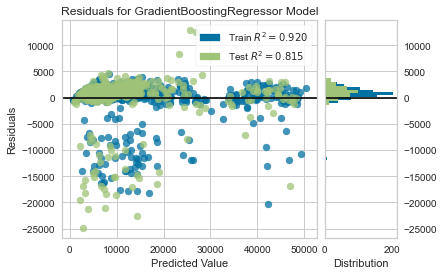

In [23]:
plot_model(best, plot='residuals')


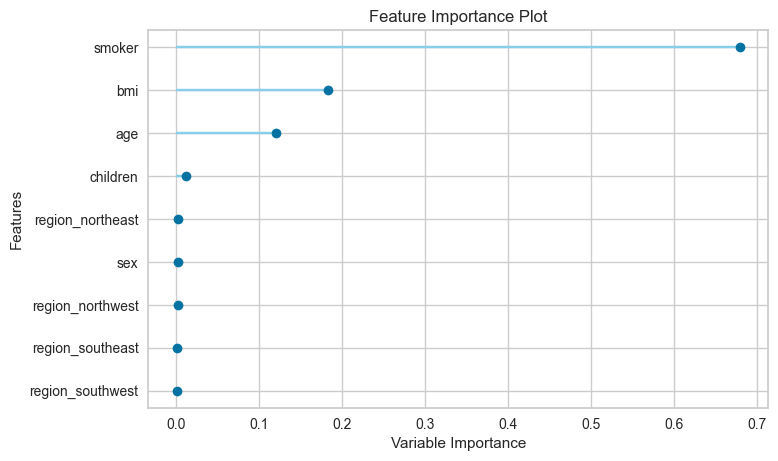

In [24]:
plot_model(best, plot = 'feature')

In [25]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2692.1642,25028953.7662,5002.8945,0.8150,0.4515,0.2712


,age,sex,bmi,children,smoker,region_southeast,region_northwest,region_northeast,region_southwest,charges,prediction_label
936,41.0,0.0,28.309999,1.0,0.0,0.0,1.0,0.0,0.0,7153.553711,7152.909062
937,45.0,1.0,27.500000,3.0,0.0,0.0,0.0,0.0,1.0,8615.299805,10490.057849
938,25.0,0.0,34.485001,0.0,0.0,0.0,1.0,0.0,0.0,3021.809082,3490.197554
939,44.0,0.0,27.645000,0.0,0.0,0.0,1.0,0.0,0.0,7421.194336,9918.325083
940,50.0,1.0,32.299999,2.0,0.0,0.0,0.0,0.0,1.0,9630.397461,11247.610636
...,...,...,...,...,...,...,...,...,...,...,...
1333,18.0,0.0,33.880001,0.0,0.0,1.0,0.0,0.0,0.0,11482.634766,2235.560754
1334,31.0,1.0,25.900000,3.0,1.0,0.0,0.0,0.0,1.0,19199.943359,18883.204689
1335,64.0,1.0,26.410000,0.0,0.0,0.0,0.0,1.0,0.0,14394.557617,17594.108950
1336,37.0,0.0,25.555000,1.0,1.0,0.0,0.0,1.0,0.0,20296.863281,20323.256311


In [26]:
predictions = predict_model(best, data=data)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2117.0516,16029501.6946,4003.6860,0.8906,0.3573,0.2306


,age,sex,bmi,children,smoker,region_southeast,region_northwest,region_northeast,region_southwest,charges,prediction_label
0,19.0,0.0,27.900000,0.0,1.0,0.0,0.0,0.0,1.0,16884.923828,19086.848234
1,18.0,1.0,33.770000,1.0,0.0,1.0,0.0,0.0,0.0,1725.552246,2659.869517
2,28.0,1.0,33.000000,3.0,0.0,1.0,0.0,0.0,0.0,4449.461914,5642.626426
3,33.0,1.0,22.705000,0.0,0.0,0.0,1.0,0.0,0.0,21984.470703,6957.685013
4,32.0,1.0,28.879999,0.0,0.0,0.0,1.0,0.0,0.0,3866.855225,3474.889717


In [27]:
save_model(best, 'my_best_pipline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\QAZIMO~1\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(fill_value='constant',
                                                               strategy='constant'))),
                 ('ordinal_encodi...
                                                                         {'col': 'smoker',
                                                                          'mapping': {nan: -1,
                                                                                      'no': 0,
                                                                                      'yes': 1}}]))),
                 ('onehot_encodin

In [28]:
loaded_model = load_model("my_best_pipline")
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=Memory(location=C:\Users\QAZIMO~1\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(fill_value='constant',
                                                              strategy='constant'))),
                ('ordinal_encodi...
                                                                        {'col': 'smoker',
                                                                         'mapping': {nan: -1,
                                                                                     'no': 0,
                                                                                     'yes': 1

In [29]:
df1 = predict_model(loaded_model,data)
df1

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2117.0516,16029501.6946,4003.6860,0.8906,0.3573,0.2306


,age,sex,bmi,children,smoker,region_southeast,region_northwest,region_northeast,region_southwest,charges,prediction_label
0,19.0,0.0,27.900000,0.0,1.0,0.0,0.0,0.0,1.0,16884.923828,19086.848234
1,18.0,1.0,33.770000,1.0,0.0,1.0,0.0,0.0,0.0,1725.552246,2659.869517
2,28.0,1.0,33.000000,3.0,0.0,1.0,0.0,0.0,0.0,4449.461914,5642.626426
3,33.0,1.0,22.705000,0.0,0.0,0.0,1.0,0.0,0.0,21984.470703,6957.685013
4,32.0,1.0,28.879999,0.0,0.0,0.0,1.0,0.0,0.0,3866.855225,3474.889717
...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,1.0,30.969999,3.0,0.0,0.0,1.0,0.0,0.0,10600.547852,11748.837756
1334,18.0,0.0,31.920000,0.0,0.0,0.0,0.0,1.0,0.0,2205.980713,3458.026964
1335,18.0,0.0,36.849998,0.0,0.0,1.0,0.0,0.0,0.0,1629.833496,2745.565871
1336,21.0,0.0,25.799999,0.0,0.0,0.0,0.0,0.0,1.0,2007.944946,2973.516711
